In [3]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#import class utente
import utente

import importlib as imp
import sys

## Carregamento dos dados

Em máquina Windows ocorre regularmente "Memory Error", provavelmente devido a algumas variáveis que não são limpas ou à cache do servidor do Jupyter. <br>
Um **fix** temporário (se não tivermos o ficheiro local PICKLE) pode ser:
1. Carregar utente.ListaUtentes com forceFetch = True <br>
2. Guardar localmente estrutura objectos em ficheiro PICKLE com output2FileHistoricosTodosUtentes() <br>
3. Fechar e voltar a abrir o Notebook <br>
4. Carregar utente.ListaUtentes com forceFetch = False <br> 
5. Carregar o Pandas Dataframe com pd.DataFrame(listaUtentes.generateDataset()) 

In [5]:
# Opcional: Reload módulo utente
imp.reload(sys.modules['utente']);

In [6]:
# Carregamento estrutura dados (passar parâmetro forceFetch = True para forçar leitura BD >> Demorado!)
listaUtentes = utente.ListaUtentes(forceFetch = False, sqlLimit = 99999999999) # Carrega dados locais a partir de PICKLE

Loading from ./temp/ListaUtentes.pickle
Finished


In [7]:
# Guarda o Pickel localmente
listaUtentes.save()

Saving to ./temp/ListaUtentes.pickle


In [8]:
# Criação do dataframe pandas
df = pd.DataFrame(listaUtentes.generateDataset())
listaUtentes = None # Limpa listaUtentes depois de gerar Dataset

In [9]:
# Listagem Colunas do dataframe
[print(col) for col in df];

AreaCurso
AreaFormacao
CategoriaAtrib
CnpAnterior
ConjugeMotivoIndisponibilidade
CursoAnoConclusao
CursoEstabelecimentoEnsinoSup
Data
DataNascimento
DiasDesemprego
Empregado
EstadoCivil
FormacaoProf
HabilitacaoEscolar
Idade
LTU
Nacionalidade
NivelDeficiencia
NrAnulacoes
NrAnulacoesPorMotivo_CADUCIDADE DO DOCUMENTO DE IDENTIFICAÇÃO
NrAnulacoesPorMotivo_COLOCAÇÃO - CANDIDATURA EXTERNA
NrAnulacoesPorMotivo_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA DE OUTREM
NrAnulacoesPorMotivo_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA PRÓPRIA
NrAnulacoesPorMotivo_CORRECÇÃO COLOCAÇÃO FME
NrAnulacoesPorMotivo_CORRECÇÃO REINSCRIÇÃO FME
NrAnulacoesPorMotivo_CRIAÇÃO DO PRÓPRIO EMPREGO
NrAnulacoesPorMotivo_CUMPRIMENTO SERVIÇO MILITAR
NrAnulacoesPorMotivo_DESISTIU
NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE FORMAÇÃO
NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE MEDIDAS DE EMPREGO (EXCLUI TRABALHO SOCIALMENTE NECESSÁRIO)
NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE TRABALHO SOCIALMENTE NECESSÁRIO
NrAnulacoe

In [13]:
summary=df.describe(include = 'all')
summary=summary.transpose()
summary.head()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
AreaCurso,22280,1528,GESTÃO,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AreaFormacao,23626,100,GESTÃO E ADMINISTRAÇÃO,2691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CategoriaAtrib,123701,4,DESEMPREGADO-NOVO EMPREGO,105664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CnpAnterior,99687,1129,"ESCRITURÁRIO,EM GERAL",6384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConjugeMotivoIndisponibilidade,23,3,01,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Type of each variable in the pandas data frame
type(df)
df.dtypes

AreaCurso                                                                                                              object
AreaFormacao                                                                                                           object
CategoriaAtrib                                                                                                         object
CnpAnterior                                                                                                            object
ConjugeMotivoIndisponibilidade                                                                                         object
CursoAnoConclusao                                                                                                      object
CursoEstabelecimentoEnsinoSup                                                                                          object
Data                                                                                                           datetim

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E14F15DB38>]], dtype=object)

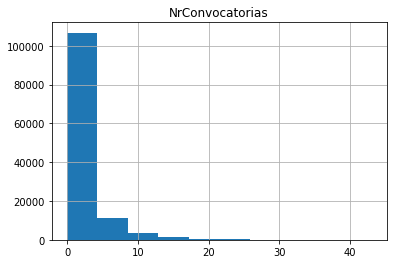

In [48]:
#df histograms
pd.DataFrame.hist(df, column='NrConvocatorias')

AttributeError: 'AxesSubplot' object has no attribute 'pd'

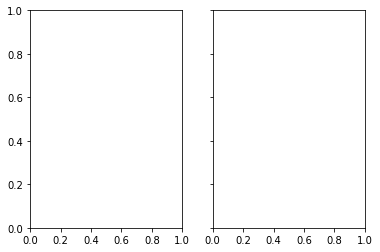

In [49]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pd.DataFrame.hist(df,column='Idade')
ax1.set_title('Sharing Y axis')
ax2.pd.DataFrame.hist(df,column='NrConvocatorias')